In [38]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import warnings



warnings.filterwarnings("ignore")

dataset_number = 16
data = pd.read_csv(f"Grocery_Items_{dataset_number}.csv", header=None)

In [39]:

flattened_data = data.values.flatten()

cleaned_data = pd.Series(flattened_data).dropna()

unique_items = cleaned_data.nunique()
total_records = cleaned_data.size
most_popular_item = cleaned_data.value_counts().idxmax()
most_popular_item_count = cleaned_data.value_counts().max()

print(f"Unique items: {unique_items}")
print(f"Total records: {total_records}")
print(f"Most popular item: '{most_popular_item}' (appears {most_popular_item_count} times)")


Unique items: 176
Total records: 20631
Most popular item: 'whole milk' (appears 1341 times)


In [40]:
transactions = [
    [str(item) for item in transaction] for transaction in data.values.tolist()
]


te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)


frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets), metric="confidence", min_threshold=0.08)

print("Association Rules:")
print(rules)

Association Rules:
              antecedents        consequents  antecedent support  \
0              (UHT-milk)              (nan)            0.022122   
1                  (beef)              (nan)            0.034996   
2               (berries)              (nan)            0.020872   
3             (beverages)              (nan)            0.017123   
4          (bottled beer)              (nan)            0.044244   
..                    ...                ...                 ...   
98     (soda, whole milk)              (nan)            0.011624   
99                 (soda)  (nan, whole milk)            0.095488   
100         (yogurt, nan)       (whole milk)            0.082990   
101  (yogurt, whole milk)              (nan)            0.010249   
102              (yogurt)  (nan, whole milk)            0.083115   

     consequent support   support  confidence      lift  representativity  \
0              0.999750  0.022122    1.000000  1.000250               1.0   
1         

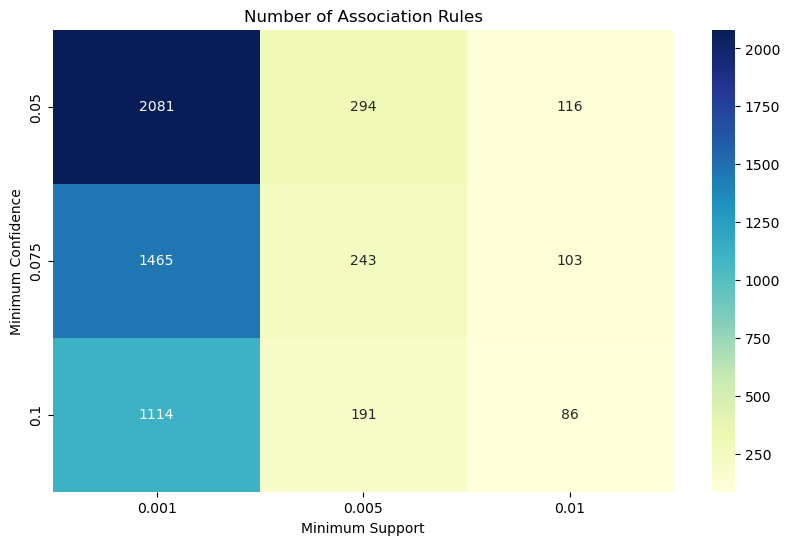

In [41]:
min_support_values = [0.001, 0.005, 0.01]
min_confidence_thresholds = [0.05, 0.075, 0.1]


count_results = {}


for msv in min_support_values:
    for mct in min_confidence_thresholds:
        frequent_itemsets = apriori(df, min_support=msv, use_colnames=True)
        rules = association_rules(frequent_itemsets,num_itemsets=len(frequent_itemsets),metric="confidence",min_threshold=mct)

        count_results[(msv, mct)] = len(rules)


count_df = pd.DataFrame(list(count_results.items()), columns=["Parameters", "Count"])
count_df[["Minimum Support", "Minimum Confidence"]] = pd.DataFrame(
    count_df["Parameters"].tolist(), index=count_df.index
)
count_df = count_df.pivot(
    index="Minimum Confidence", columns="Minimum Support", values="Count"
)


plt.figure(figsize=(10, 6))
sns.heatmap(count_df, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Minimum Support")
plt.ylabel("Minimum Confidence")
plt.title("Number of Association Rules")
plt.show()

Found 594 validated image filenames belonging to 4 classes.
Found 149 validated image filenames belonging to 4 classes.
Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 248ms/step - accuracy: 0.2460 - loss: 1.4120 - val_accuracy: 0.3087 - val_loss: 1.3856
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2618 - loss: 1.3859 - val_accuracy: 0.3020 - val_loss: 1.3853
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2540 - loss: 1.3833 - val_accuracy: 0.3087 - val_loss: 1.3660
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2821 - loss: 1.3735 - val_accuracy: 0.2819 - val_loss: 1.3242
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3146 - loss: 1.3205 - val_accuracy: 0.4564 - val_loss: 1.2790
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4423 - loss: 1.2899 - val_accuracy: 0.4497 - val_loss: 1.2524
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4465 - loss: 1.2597 - val_accuracy: 0.4765 - val_los

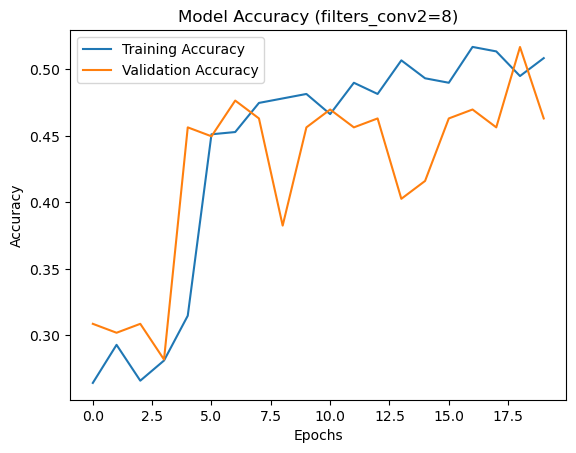

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.2759 - loss: 1.3870 - val_accuracy: 0.3020 - val_loss: 1.3856
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2759 - loss: 1.3848 - val_accuracy: 0.3020 - val_loss: 1.3852
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2618 - loss: 1.3844 - val_accuracy: 0.3020 - val_loss: 1.3849
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2728 - loss: 1.3839 - val_accuracy: 0.3020 - val_loss: 1.3846
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2818 - loss: 1.3823 - val_accuracy: 0.3020 - val_loss: 1.3845
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2864 - loss: 1.3816 - val_accuracy: 0.3020 - val_loss: 1.3842
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3040 - loss: 1.3798 - val_accuracy: 0.3020 - val_loss: 1.3841
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2866 - loss: 1.3812 - val_accuracy: 0.3020 - v

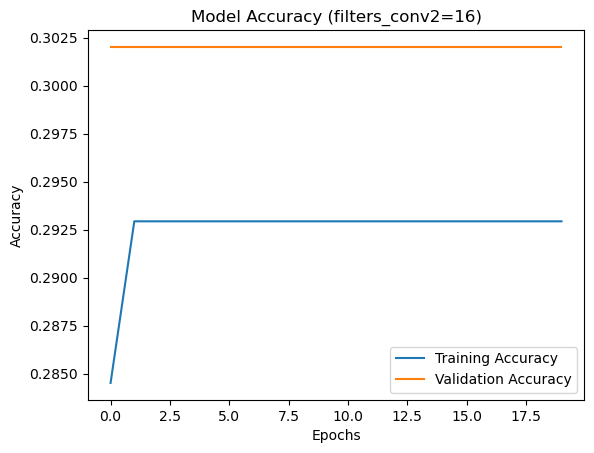

In [42]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from glob import glob

# Step 1: Image paths and labels
def images_labels():
    paths = []
    labels = []
    breeds = sorted(os.listdir(r'D:\19761A1222\MASTERS\DATA MINING\Cropped_Images'))
    for idx, file in enumerate(breeds):
        folder = os.path.join(r'D:\19761A1222\MASTERS\DATA MINING\Cropped_Images', file)
        files = glob(os.path.join(folder, '*.jpg'))
        paths.extend(files)
        labels.extend([file] * len(files))
    return paths, labels

# Load image paths and labels
paths, labels = images_labels()
dog_data = pd.DataFrame({'image': paths, 'label': labels})

# Split the data into train and validation sets
train_data, val_data = train_test_split(dog_data, test_size=0.2, random_state=42)

# Step 2: Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='image',
    y_col='label',
    target_size=(64, 64),  # Resize to 64x64 images
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='image',
    y_col='label',
    target_size=(64, 64),  # Resize to 64x64 images
    batch_size=32,
    class_mode='categorical'
)

# Step 3: CNN Model Architecture
def build_model(filters_conv2):
    model = Sequential()
    
    # First Convolutional Layer
    model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    # Second Convolutional Layer
    model.add(Conv2D(filters_conv2, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten the Tensor
    model.add(Flatten())
    
    # Fully Connected Layer
    model.add(Dense(8, activation='relu'))
    
    # Output Layer
    model.add(Dense(4, activation='softmax'))  # 4 classes for classification
    
    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Step 4: Train and Plot Learning Curves
def train_and_plot_model(filters_conv2):
    model = build_model(filters_conv2)
    
    # Train the model
    history = model.fit(
        train_generator,
        epochs=20,  # You can reduce epochs if training is slow
        validation_data=val_generator,
        validation_split=0.2,
        batch_size=32
    )
    
    # Plot the learning curves (accuracy)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy (filters_conv2={filters_conv2})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Step 5: Train and plot for different filter sizes
train_and_plot_model(8)  # For second convolution layer with 8 filters
train_and_plot_model(16)  # For second convolution layer with 16 filters


### Learning Curve
- The **first model** exhibits a steady improvement in both training and validation metrics, suggesting better generalization.
- The **second model** struggles to improve validation accuracy significantly and appears to converge prematurely.

### Overfitting
- The **first model** shows slight overfitting towards the end, as the validation loss begins to stagnate while training accuracy increases.
- The **second model** does not overfit but may be underfitting due to lower capacity or insufficient feature extraction.

### Validation Accuracy Plateau
- For the **second model**, the lack of significant improvement in validation accuracy (~46.31%) suggests it fails to learn complex patterns effectively.


In [30]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
import json
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import json
import torch
from transformers import BertTokenizer

def load_json_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        data = [json.loads(line.strip()) for line in f]
    return data

train_data = load_json_file(r'D:\19761A1222\MASTERS\DATA MINING\train.json')
test_data = load_json_file(r'D:\19761A1222\MASTERS\DATA MINING\test.json')
val_data = load_json_file(r'D:\19761A1222\MASTERS\DATA MINING\validation.json')

# Print the structure of the first item in train_data
print("Structure of first item in train_data:")
print(json.dumps(train_data[0], indent=2))

# Define label classes
all_labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 
              'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']

# Convert labels to one-hot encoded lists
def convert_labels_to_list(data, label_classes):
    print("Keys in data item:", list(data[0].keys()))
    for item in data:
        item['labels'] = [float(item[label]) for label in label_classes]
    return data

train_data = convert_labels_to_list(train_data, all_labels)
val_data = convert_labels_to_list(val_data, all_labels)
test_data = convert_labels_to_list(test_data, all_labels)

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the texts
def encode_texts(data):
    # Assuming 'tweet' is the key for the text content. Adjust if necessary.
    texts = [item['tweet'] for item in data]
    return tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors='pt')

# Try to encode texts and catch any errors
try:
    train_encodings = encode_texts(train_data)
    test_encodings = encode_texts(test_data)
    val_encodings = encode_texts(val_data)
except KeyError as e:
    print(f"KeyError: {e}. The key for text content might be incorrect.")
    print("Available keys:", list(train_data[0].keys()))

# Convert labels to tensors
train_labels = torch.tensor([item['labels'] for item in train_data], dtype=torch.float)
test_labels = torch.tensor([item['labels'] for item in test_data], dtype=torch.float)
val_labels = torch.tensor([item['labels'] for item in val_data], dtype=torch.float)

# Print shapes to verify
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)
print("Validation labels shape:", val_labels.shape)

# If encodings were successful, print their shapes too
if 'train_encodings' in locals():
    print("Train encodings shape:", train_encodings['input_ids'].shape)
    print("Test encodings shape:", test_encodings['input_ids'].shape)
    print("Validation encodings shape:", val_encodings['input_ids'].shape)


Structure of first item in train_data:
{
  "ID": "2017-En-21153",
  "Tweet": "Losing to Villa...'@M0tivati0nQuote: Most of the things people worry about are things that won't even matter to them a few months from now.'",
  "anger": false,
  "anticipation": true,
  "disgust": false,
  "fear": false,
  "joy": false,
  "love": false,
  "optimism": true,
  "pessimism": false,
  "sadness": false,
  "surprise": false,
  "trust": false
}
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
KeyError: 'tweet'. The key for text content might be incorrect.
Available keys: ['ID', 'Tweet', 'anger', 'antici

In [32]:
import json
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer

def load_json_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        data = [json.loads(line.strip()) for line in f]
    return data

train_data = load_json_file(r'C:\Users\vishn\HMMNagarjuna\A1\train.json')
test_data = load_json_file(r'C:\Users\vishn\HMMNagarjuna\A1\test.json')
val_data = load_json_file(r'C:\Users\vishn\HMMNagarjuna\A1\validation.json')

# Print the structure of the first item in train_data
print("Structure of first item in train_data:")
print(json.dumps(train_data[0], indent=2))

# Define label classes
all_labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 
              'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']

# Convert labels to one-hot encoded lists
def convert_labels_to_list(data, label_classes):
    print("Keys in data item:", list(data[0].keys()))
    for item in data:
        item['labels'] = [float(item[label]) for label in label_classes]
    return data

train_data = convert_labels_to_list(train_data, all_labels)
val_data = convert_labels_to_list(val_data, all_labels)
test_data = convert_labels_to_list(test_data, all_labels)

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the texts
def encode_texts(data):
    text_key = 'Tweet'  # Changed to 'Tweet' to match your data structure
    if text_key not in data[0]:
        raise KeyError(f"'{text_key}' not found in data. Available keys: {list(data[0].keys())}")
    texts = [item[text_key] for item in data]
    return tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors='pt')

# Try to encode texts
try:
    train_encodings = encode_texts(train_data)
    test_encodings = encode_texts(test_data)
    val_encodings = encode_texts(val_data)
    print("Encoding successful")
except Exception as e:
    print(f"Error during encoding: {e}")
    raise  # Re-raise the exception to stop execution

# Convert labels to tensors
train_labels = torch.tensor([item['labels'] for item in train_data], dtype=torch.float)
test_labels = torch.tensor([item['labels'] for item in test_data], dtype=torch.float)
val_labels = torch.tensor([item['labels'] for item in val_data], dtype=torch.float)

# Print shapes to verify
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Train encodings shape:", train_encodings['input_ids'].shape)
print("Test encodings shape:", test_encodings['input_ids'].shape)
print("Validation encodings shape:", val_encodings['input_ids'].shape)

def create_dataloader(encodings, labels, batch_size=16):
    input_ids = encodings['input_ids']
    attention_mask = encodings['attention_mask']
    dataset = TensorDataset(input_ids, attention_mask, labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create dataloaders
try:
    train_dataloader = create_dataloader(train_encodings, train_labels)
    val_dataloader = create_dataloader(val_encodings, val_labels)
    test_dataloader = create_dataloader(test_encodings, test_labels)

    print("Train dataloader size:", len(train_dataloader))
    print("Validation dataloader size:", len(val_dataloader))
    print("Test dataloader size:", len(test_dataloader))
except Exception as e:
    print(f"Error creating dataloaders: {e}")
    print("Shape of train_encodings:", {k: v.shape for k, v in train_encodings.items()})
    print("Shape of train_labels:", train_labels.shape)

Structure of first item in train_data:
{
  "ID": "2017-En-21153",
  "Tweet": "Losing to Villa...'@M0tivati0nQuote: Most of the things people worry about are things that won't even matter to them a few months from now.'",
  "anger": false,
  "anticipation": true,
  "disgust": false,
  "fear": false,
  "joy": false,
  "love": false,
  "optimism": true,
  "pessimism": false,
  "sadness": false,
  "surprise": false,
  "trust": false
}
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Encoding successful
Train labels shape: torch.Size([3000, 11])
Test labels shape: torch.Size([1500, 11])
Validat

In [33]:
from transformers import BertForSequenceClassification
from torch.optim import AdamW

# Define the number of labels
num_labels = len(all_labels)  # This should be 11 based on your previous code

# Initialize the BERT model for multi-label classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
                                                      num_labels=num_labels,
                                                      problem_type="multi_label_classification")

# Initialize the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Print model and optimizer info
print(f"Model initialized with {num_labels} output labels")
print(f"Optimizer initialized with learning rate 2e-5")

# If you're using a GPU, move the model to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Model moved to {device}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model initialized with 11 output labels
Optimizer initialized with learning rate 2e-5
Model moved to cpu


In [35]:
import json
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from tqdm import tqdm

# Load dataset
def load_json_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line.strip()) for line in f]

# Load full datasets
train_data = load_json_file(r'D:\19761A1222\MASTERS\DATA MINING\train.json')
test_data = load_json_file(r'D:\19761A1222\MASTERS\DATA MINING\test.json')
val_data = load_json_file(r'D:\19761A1222\MASTERS\DATA MINING\validation.json')

print(f"Loaded {len(train_data)} training samples, {len(val_data)} validation samples, {len(test_data)} test samples")

# Define emotion labels
all_labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 
              'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']

# Convert labels to one-hot encoded format
def convert_labels_to_one_hot(data, label_classes):
    for item in data:
        item['labels'] = [float(item[label]) for label in label_classes]
    return data

train_data = convert_labels_to_one_hot(train_data, all_labels)
val_data = convert_labels_to_one_hot(val_data, all_labels)
test_data = convert_labels_to_one_hot(test_data, all_labels)

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode text data
def tokenize_and_encode(data):
    text_key = 'Tweet'  # Ensure this matches your dataset's text field
    texts = [item[text_key] for item in data]
    return tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors='pt')

train_encodings = tokenize_and_encode(train_data)
val_encodings = tokenize_and_encode(val_data)
test_encodings = tokenize_and_encode(test_data)

# Convert labels to tensors
train_labels = torch.tensor([item['labels'] for item in train_data], dtype=torch.float)
val_labels = torch.tensor([item['labels'] for item in val_data], dtype=torch.float)
test_labels = torch.tensor([item['labels'] for item in test_data], dtype=torch.float)

# Create DataLoader for batching
def create_dataloader(encodings, labels, batch_size=16):
    dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

train_dataloader = create_dataloader(train_encodings, train_labels)
val_dataloader = create_dataloader(val_encodings, val_labels)
test_dataloader = create_dataloader(test_encodings, test_labels)

# Load pre-trained BERT model for multi-label classification
num_labels = len(all_labels)
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased', num_labels=num_labels, problem_type="multi_label_classification"
)

# Set up optimizer and device
optimizer = AdamW(model.parameters(), lr=2e-5)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training loop
num_epochs = 5  # Adjust epochs as needed
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]')
    
    for batch in progress_bar:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        
        progress_bar.set_postfix({'train_loss': f'{loss.item():.4f}'})
    
    avg_train_loss = total_train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc=f'Epoch {epoch+1}/{num_epochs} [Val]'):
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            total_val_loss += outputs.loss.item()
    
    avg_val_loss = total_val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)
    
    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {avg_train_loss:.4f}')
    print(f'Validation Loss: {avg_val_loss:.4f}')
    print('-' * 50)

print("Training completed!")

# Save trained model
torch.save(model.state_dict(), 'bert_multi_label_model.pth')
print("Model saved!")


Loaded 3000 training samples, 400 validation samples, 1500 test samples


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/5 [Val]: 100%|█████████████████████████████████████████████████████████████████| 25/25 [00:21<00:00,  1.16it/s]


Epoch 1/5:
Train Loss: 0.4621
Validation Loss: 0.3636
--------------------------------------------------


Epoch 2/5 [Val]: 100%|█████████████████████████████████████████████████████████████████| 25/25 [00:20<00:00,  1.22it/s]


Epoch 2/5:
Train Loss: 0.3418
Validation Loss: 0.3233
--------------------------------------------------


Epoch 3/5 [Val]: 100%|█████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.33it/s]


Epoch 3/5:
Train Loss: 0.2814
Validation Loss: 0.3079
--------------------------------------------------


Epoch 4/5 [Val]: 100%|█████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.35it/s]


Epoch 4/5:
Train Loss: 0.2422
Validation Loss: 0.3059
--------------------------------------------------


Epoch 5/5 [Val]: 100%|█████████████████████████████████████████████████████████████████| 25/25 [00:14<00:00,  1.73it/s]


Epoch 5/5:
Train Loss: 0.2129
Validation Loss: 0.3149
--------------------------------------------------
Training completed!
Model saved!


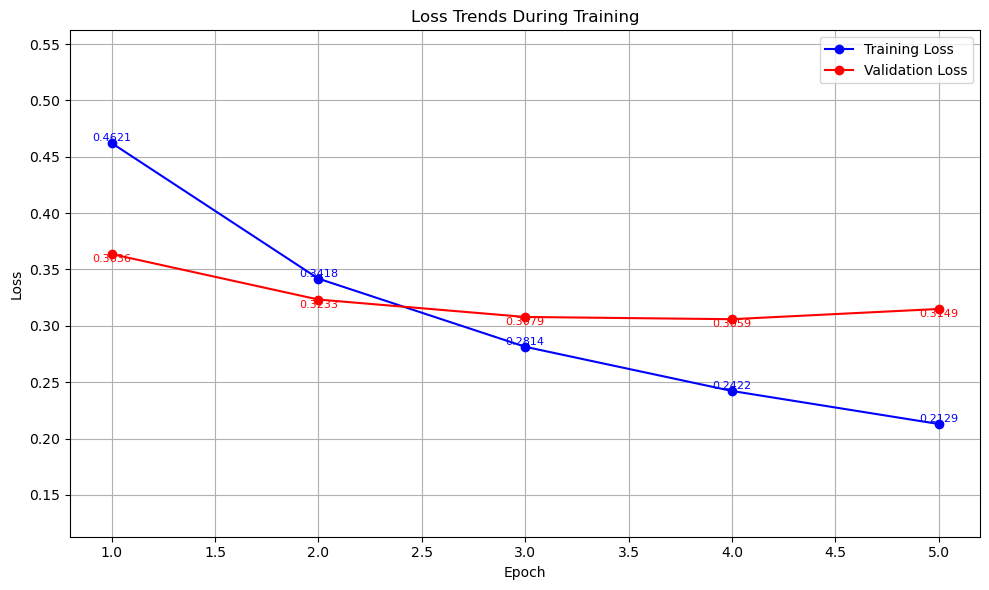

In [36]:
import matplotlib.pyplot as plt

# Function to visualize training and validation loss curves
def plot_learning_curves(train_losses, val_losses):
    # Create a range of epochs based on the length of loss data
    epochs = range(1, len(train_losses) + 1)
    
    # Set figure size
    plt.figure(figsize=(10, 6))
    
    # Plot training and validation loss with distinct markers
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')  # Blue line for training loss
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')  # Red line for validation loss
    
    # Add title and axis labels
    plt.title('Loss Trends During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()  # Add a legend to distinguish between curves
    plt.grid(True)  # Add grid lines for easier reading
    
    # Dynamically set y-axis limits slightly beyond min and max losses
    y_min = min(min(train_losses), min(val_losses)) - 0.1
    y_max = max(max(train_losses), max(val_losses)) + 0.1
    plt.ylim([y_min, y_max])
    
    # Annotate loss values on the plot for better clarity
    for epoch, (train_loss, val_loss) in enumerate(zip(train_losses, val_losses), start=1):
        plt.text(epoch, train_loss, f'{train_loss:.4f}', ha='center', va='bottom', fontsize=8, color='blue')
        plt.text(epoch, val_loss, f'{val_loss:.4f}', ha='center', va='top', fontsize=8, color='red')
    
    # Optimize spacing and save the plot with a detailed filename
    plt.tight_layout()
    plt.savefig(f'learning_curves_{len(train_losses)}_epochs.png')
    
    # Display the plot in the output
    plt.show()

# Plot the learning curves using the recorded losses
plot_learning_curves(train_losses, val_losses)


In [37]:
import torch
from sklearn.metrics import accuracy_score
import numpy as np

# Function to calculate exact match accuracy
def compute_exact_match_accuracy(predictions, true_labels):
    # Checks if all predicted labels match the true labels for each instance
    return np.mean(np.all(predictions == true_labels, axis=1))

# Function to calculate partial match accuracy
def compute_partial_match_accuracy(predictions, true_labels):
    # Checks if at least one predicted label matches the true labels for each instance
    return np.mean([
        any(pred == true for pred, true in zip(pred_row, true_row)) 
        for pred_row, true_row in zip(predictions, true_labels)
    ])

# Evaluate the model's performance on the test dataset
model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []

# Disable gradient computation during evaluation
with torch.no_grad():
    for batch in test_dataloader:
        # Move batch data to the device (CPU/GPU)
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        
        # Generate predictions
        outputs = model(input_ids, attention_mask=attention_mask)
        
        # Apply sigmoid to logits to get probabilities for each label
        logits = outputs.logits
        predictions = torch.sigmoid(logits).cpu().numpy()
        labels = labels.cpu().numpy()
        
        # Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
        pred_labels = (predictions > 0.5).astype(int)
        
        # Store predictions and true labels for further evaluation
        all_preds.append(pred_labels)
        all_labels.append(labels)

# Combine all predictions and true labels into numpy arrays
all_preds = np.vstack(all_preds)
all_labels = np.vstack(all_labels)

# Calculate the exact match accuracy (all predicted labels must match the true labels)
exact_match_accuracy = compute_exact_match_accuracy(all_preds, all_labels)
print(f'Exact Match Accuracy: {exact_match_accuracy:.4f}')

# Calculate the partial match accuracy (at least one predicted label must match the true labels)
partial_match_accuracy = compute_partial_match_accuracy(all_preds, all_labels)
print(f'Partial Match Accuracy: {partial_match_accuracy:.4f}')


Exact Match Accuracy: 0.2653
Partial Match Accuracy: 1.0000
